# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [10]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np

# Create two new dataframes

north = pd.read_csv('/Users/fatima/Desktop/LaunchCode/data-analysis-projects/call-center-cleanup-assignment/NorthCallCenter.csv')
south = pd.read_csv('/Users/fatima/Desktop/LaunchCode/data-analysis-projects/call-center-cleanup-assignment/SouthCallCenter.csv')

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [11]:
# EDA Question 1A solution below:

north.value_counts('Rep ID')

Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: count, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [12]:
# EDA Question 1B solution Below:

south.value_counts('Rep ID')

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [13]:
# EDA Question 2A solution Below:

north.describe()

#North Branch Stats: 
#Average busy minutes: 9.99 minutes
#Average not ready minutes: 1.91 minutes
#Average incoming wait time: 3.05 minutes
#Average during call wait time 2.98 minutes

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [14]:
# EDA Question 2B solution Below:

south.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [15]:
# EDA Question 3 solution Below:

north_timeblock_count = north.value_counts('Time Block')
north_timeblock_count

Time Block
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: count, dtype: int64

In [16]:
south_timeblock_count = south.value_counts('Time Block')
south_timeblock_count

Time Block
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: count, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



In [18]:
#time_block_group = np.sort(df['Time Block'].unique())
#calls_timeblock = np.sort(df.groupby('Time Block')['Calls'].sum())

#plt.bar(x=time_block_group, height=calls_timeblock)
#plt.xticks(rotation=45)
#plt.xlabel('Time Block')
#plt.ylabel('Total Number of Calls')
#plt.title('Total Numbers of Calls per Time Block')

#This is a barplot showing the number of calls per time block but df does not get defined till Task 3. This code has been coded out and will be left for reference only.

## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [8]:
# Question 1 solution below

north.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [9]:
south.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [10]:
north_nulls = north[north['Incoming Wait Time'].isnull()]

north_nulls.value_counts('Incoming or Outgoing')

Incoming or Outgoing
Outgoing    163
Name: count, dtype: int64

In [11]:
south_nulls = south[south['Incoming Wait Time'].isnull()]

south_nulls.value_counts('Incoming or Outgoing')

Incoming or Outgoing
Outgoing    188
Name: count, dtype: int64

#### Record your answer below:

> Your Answer: The only column with missing data is the 'Incoming Wait Time' column. This could be because this call had zero incoming call wait time and was answered/assigned to a rep right away. After further review, it looks like the calls with null values for 'Incoming Wait Time' are all outgoing calls, therefore, not having an incoming wait call. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [12]:
# Cleaning Question 2 solution below:

north.value_counts('Sale')



Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [13]:
north_sales_yes = north[north['Sale'] != 'YES']

north_sales_yes.sort_values('Sale', ascending=False)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
155,155,North,Product Support,11:00 AM,Outgoing,B,Brent,NO,0,0,12,2,NaN,3,1
157,157,North,Product Support,12:00 PM,Outgoing,B,Lilly,NO,0,0,11,1,NaN,2,1
158,158,North,Product Support,12:00 PM,Outgoing,B,Todd,NO,0,0,8,2,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,North,Product Support,11:00 AM,Outgoing,A,Amanda,NO,0,1,11,2,NaN,2,1
90,90,North,Sales Support,10:00 AM,Outgoing,B,Brent,NO,0,0,11,3,NaN,4,1
91,91,North,Sales Support,10:00 AM,Outgoing,B,Todd,NO,0,0,10,2,NaN,2,1
92,92,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,8,2,NaN,2,1


In [108]:
north['Sale'] = north['Sale'].str.strip()

north.value_counts('Sale')



Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: This column was not used in this particular analysis but could be useful in other business issues/analysis. I used strip() to clean up the data.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [15]:
# Cleaning Question 3 solution below:

north_dups = north.duplicated().sort_values(ascending=False)

north_dups.value_counts()

False    245
Name: count, dtype: int64

In [16]:
south_dups = south.duplicated().sort_values(ascending=False)

south_dups.value_counts()

False    314
Name: count, dtype: int64

##### Record your answer below:
> Your Answer: There are no duplicates in both datasets.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Cleaning Question 4 solution below:

north

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [18]:
south

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: At this time, the only column that I believe is unnecessary is '0: Unnamed' column. This column looks like an index but it seems duplicative. I will choose to keep that column for now and it proves to be unnecessary in the analysis I will drop the column. Another column I would think is unnecesary is 'Queue'. I dont think it's necessary for the business question but at this time I will keep it just incase I need it further down the line. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [19]:
# Create dataframe for the entire company named df

df = pd.concat([north, south], axis=0)

df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [20]:
# Manipulation Question solution below:

total_calls_by_rep = df.groupby(['Branch', 'Rep ID'])['Calls'].sum()
total_calls_by_rep.sort_values(ascending=False)

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Todd      29
South   George    29
        Kate      29
North   Duke      29
South   Karl      28
North   Joe       26
South   Susan     26
        Josh      26
        Sharon    25
North   Cam       24
        Xander    24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

In [21]:
brent_calls = north[north['Rep ID'] == 'Brent']

brent_calls.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,37.000000,37.0,37.000000,37.000000,37.000000,8.000000,37.000000,37.0
mean,130.810811,0.0,0.027027,9.783784,1.918919,2.125000,3.162162,1.0
std,72.047761,0.0,0.164399,1.108932,0.721818,1.807722,0.764254,0.0
min,0.000000,0.0,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,98.000000,0.0,0.000000,9.000000,1.000000,1.000000,3.000000,1.0
50%,131.000000,0.0,0.000000,10.000000,2.000000,1.000000,3.000000,1.0
75%,192.000000,0.0,0.000000,10.000000,2.000000,2.750000,4.000000,1.0
max,240.000000,0.0,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [22]:
eric_calls = south[south['Rep ID'] == 'Eric']

eric_calls.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,35.000000,35.0,35.0,35.000000,35.000000,18.000000,35.000000,35.0
mean,143.971429,0.0,0.0,10.314286,1.542857,2.611111,3.200000,1.0
std,110.573235,0.0,0.0,1.345394,0.741337,1.092159,0.759257,0.0
min,1.000000,0.0,0.0,8.000000,1.000000,1.000000,2.000000,1.0
25%,41.500000,0.0,0.0,9.000000,1.000000,2.000000,3.000000,1.0
50%,113.000000,0.0,0.0,10.000000,1.000000,2.000000,3.000000,1.0
75%,274.000000,0.0,0.0,11.500000,2.000000,3.000000,4.000000,1.0
max,312.000000,0.0,0.0,12.000000,3.000000,5.000000,4.000000,1.0


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [23]:
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [24]:
# Manipulation Question 2 solution below:

abandoned_bybranch = df.groupby('Branch')['Abandoned'].sum()

abandoned_bybranch

Branch
North    7
South    4
Name: Abandoned, dtype: int64

In [25]:
abandoned_pivot = df.pivot_table(values=['Calls', 'Abandoned'], aggfunc="sum", index='Branch')

abandoned_pivot

,Abandoned,Calls
Branch,,
North,7,245
South,4,314


In [26]:
abandoned_calls = df[df['Abandoned'] == 1]

abandoned_calls

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
17,17,North,Complaint,2:00 PM,Incoming,A,Andy,NO,0,1,9,3,2.0,4,1
46,46,North,Sales Support,12:00 PM,Incoming,A,Andy,NO,0,1,12,1,4.0,4,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
88,88,North,Product Support,9:00 AM,Outgoing,A,Andy,NO,0,1,12,2,NaN,2,1
89,89,North,Product Support,11:00 AM,Outgoing,A,Amanda,NO,0,1,11,2,NaN,2,1
77,77,South,Complaint,4:00 PM,Incoming,D,Randy,NO,0,1,12,1,4.0,4,1
136,136,South,Sales Support,10:00 AM,Outgoing,D,Helga,NO,0,1,9,1,NaN,4,1
137,137,South,Sales Support,10:00 AM,Outgoing,C,Sharon,NO,0,1,9,1,NaN,3,1


In [27]:
incoming_outgoing_pivot = df.pivot_table(values=['Calls', 'Abandoned'], aggfunc="sum", index=['Incoming or Outgoing', 'Branch'])

incoming_outgoing_pivot

Abandoned  Calls
Incoming or Outgoing Branch                  
Incoming             North           3     82
                     South           1    126
Outgoing             North           4    163
                     South           3    188

In [28]:
print('North Branch abandonment rate:',(7/245)*100,'\n','South Branch abandonment rate:',(4/314)*100,'\n','Total company abandonment rate:',(11/559)*100)


North Branch abandonment rate: 2.857142857142857 
 South Branch abandonment rate: 1.2738853503184715 
 Total company abandonment rate: 1.9677996422182469


In [29]:
df.sort_values(['Abandoned'], ascending=False).head(15)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
138,138,South,Product Support,3:00 PM,Outgoing,D,Helga,NO,0,1,12,1,NaN,2,1
137,137,South,Sales Support,10:00 AM,Outgoing,C,Sharon,NO,0,1,9,1,NaN,3,1
136,136,South,Sales Support,10:00 AM,Outgoing,D,Helga,NO,0,1,9,1,NaN,4,1
77,77,South,Complaint,4:00 PM,Incoming,D,Randy,NO,0,1,12,1,4.0,4,1
89,89,North,Product Support,11:00 AM,Outgoing,A,Amanda,NO,0,1,11,2,NaN,2,1
88,88,North,Product Support,9:00 AM,Outgoing,A,Andy,NO,0,1,12,2,NaN,2,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
17,17,North,Complaint,2:00 PM,Incoming,A,Andy,NO,0,1,9,3,2.0,4,1


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?  
Overall it looks like the company has low abandonment rates, all below 2%. 


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [30]:
# Manipulation Question 3 solution below:

two_seconds = df[df['Incoming Wait Time'] <= 2]

two_seconds

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,43,South,Complaint,2:00 PM,Incoming,D,Karl,NO,0,0,8,2,2.0,4,1
44,44,South,Complaint,3:00 PM,Incoming,C,Susan,NO,0,0,9,1,2.0,4,1
45,45,South,Complaint,3:00 PM,Incoming,D,Helga,NO,0,0,12,1,2.0,2,1
46,46,South,Complaint,3:00 PM,Incoming,C,Sandy,NO,0,0,10,3,2.0,4,1


In [31]:
incoming_wait_time = df.value_counts('Incoming Wait Time')

incoming_wait_time



Incoming Wait Time
4.0    50
2.0    44
3.0    41
1.0    37
5.0    36
Name: count, dtype: int64

In [32]:
incoming_wait_time_pivot = df.pivot_table(values=['Calls'], aggfunc='sum', index=['Branch','Incoming Wait Time'])

incoming_wait_time_pivot

Calls
Branch Incoming Wait Time       
North  1.0                    17
       2.0                    16
       3.0                    12
       4.0                    20
       5.0                    17
South  1.0                    20
       2.0                    28
       3.0                    29
       4.0                    30
       5.0                    19

In [33]:
print('North:',((17+16)/82)*100,'\n','South:',((20+28)/126)*100,'\n','Company Wide:', ((17+16+20+28)/208)*100)

North: 40.243902439024396 
 South: 38.095238095238095 
 Company Wide: 38.94230769230769


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls out of 82 incoming calls
- South Branch = 38.10%, 48 calls out of 126 incoming calls
- Company Wide = 38.94%, 81 calls out of 208 incoming calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [34]:
# Manipulation Question 4 solution below:

avg_speed_answered = df.groupby('Branch')['Incoming Wait Time'].mean()

avg_speed_answered

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

In [35]:
df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,84.340108,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,69.500000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,139.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,209.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [36]:
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


/var/folders/3w/7v9cynf939n1kcryf0n89hvw0000gn/T/ipykernel_1175/2615215531.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


<BarContainer object of 4 artists>

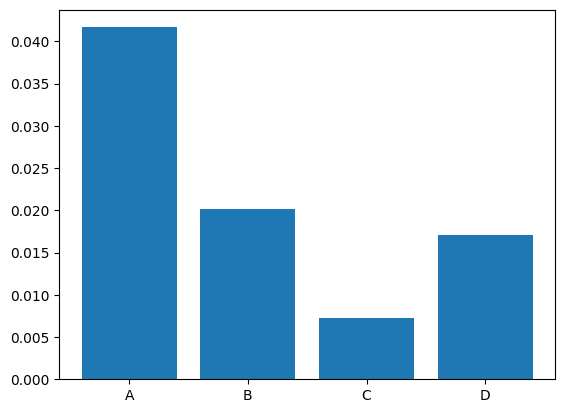

In [37]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:

import matplotlib.pyplot as plt

abandonment_rates = [abandonment_rates[queue] for queue in queues]

plt.bar(queues, abandonment_rates)


##### Record your answer below:

> Chart style you chose and why: The chart clearly identifies the queues with the highest to lowest average abandonment rate.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

Text(0, 0.5, 'Average Speed To Answer (secs)')

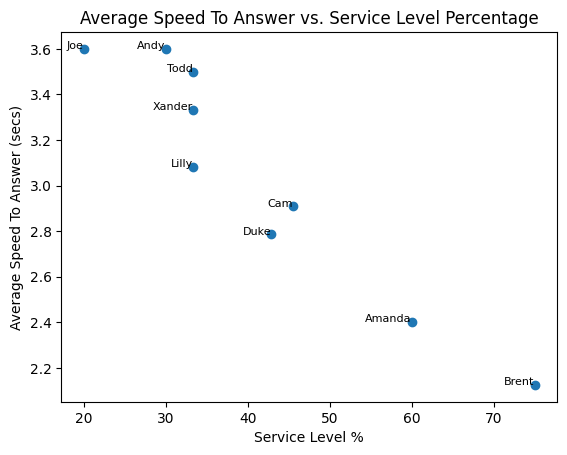

In [38]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

import seaborn as sns

service_level

plt.scatter(service_level["Service Level %"],north_plt["Incoming Wait Time"])

for i, rep_id in enumerate(north_plt["Rep ID"]):
    plt.text(service_level["Service Level %"].iloc[i], 
             north_plt["Incoming Wait Time"].iloc[i], 
             rep_id, 
             fontsize=8, 
             ha='right')
    
plt.title('Average Speed To Answer vs. Service Level Percentage')
plt.xlabel('Service Level %')
plt.ylabel('Average Speed To Answer (secs)')


##### Record your answer below:

> Chart style you chose and why: I used a scatterplot because I wanted to show service level vs. average time it takes to pick up the call. The expected relationship is the higher the service level %, the lower the average time for pick up, which is shown in the scatterplot. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


Text(0.5, 1.0, 'Complaints Incoming vs. Outgoing Calls')

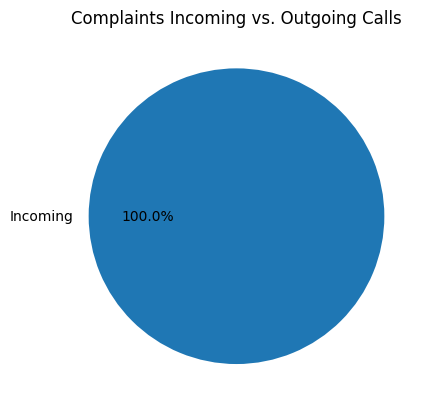

In [39]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

incoming_count = complaints.get("Incoming", 0)
complaint_counts = [incoming_count]
labels = ["Incoming"]
plt.pie(complaint_counts, labels=labels, autopct='%1.1f%%')
plt.title('Complaints Incoming vs. Outgoing Calls')


Text(0.5, 1.0, 'Sales Support Incoming vs. Outgoing Calls')

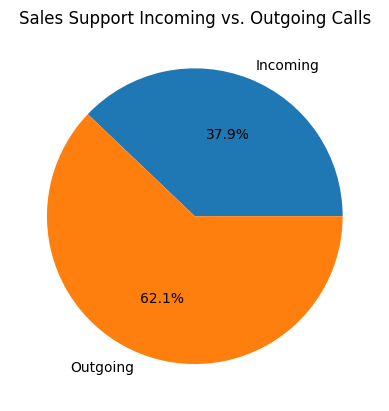

In [40]:
sales_support_counts = [sales_support["Incoming"], sales_support["Outgoing"]]
labels = ["Incoming", "Outgoing"]
plt.pie(sales_support_counts, labels=labels,autopct='%1.1f%%')
plt.title('Sales Support Incoming vs. Outgoing Calls')

Text(0.5, 1.0, 'Product Support Incoming vs. Outgoing Calls')

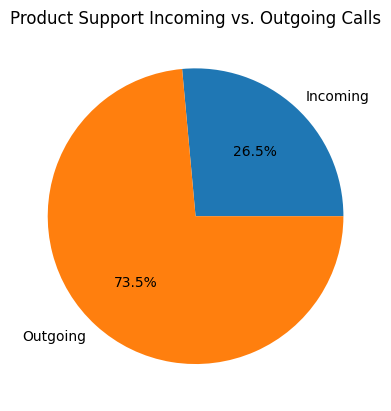

In [41]:
product_support_counts = [product_support["Incoming"], product_support["Outgoing"]]
labels = ["Incoming", "Outgoing"]
plt.pie(product_support_counts, labels=labels,autopct='%1.1f%%')
plt.title('Product Support Incoming vs. Outgoing Calls')


##### Record your answer below:

> Chart style you chose and why: Not everyone's favorite, but I chose to use a pie chart so we can compare the percentage of incoming/outgoing calls for each call purpose. It's easy to understand since there are only two categories: incoming vs outgoing. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 

Ave. Abandonment Rate
North: 9/245 calls or 2.86%
*South: 4/314 calls or 1.27%

Service Level (Calls answered within 2 secs):
*North: 33/82 incoming calls or 40.24%
South: 48/126 incoming calls or 38.10%

Avg. Speed of Answer: 
North: 3.05 secs
*South: 3.00 secs

Based on the statistics calculated, the South branch seems to be operating more efficiently compared to the North branch, but only by a small margin. The south branch also took in more calls (69 more) than the North branch. The south branch also has 11 reps, while the North branch only has 9. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 

I would add 4 reps to the North Branch bring them up to 13 reps, and 1 rep to the South Branch bringing them up to 12 reps. Adding more reps may lead to the North branch taking in more calls and taking the load off some of the South Branch calls. I would add 1 rep to the South Branch so that the number of reps are more or less equal in branch. I would then redo the analysis after the reps have been adjusted to see if the KPIs have changed with the increase in rep numbers.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 

I would like to know more about:
- Duration of call (length of time customer on the phone with agent)


In [43]:
call_purpose_pivot = df.pivot_table(values=['Calls'], aggfunc='sum', index=['Incoming or Outgoing', 'Time Block', 'Call Purpose'])

call_purpose_pivot



Calls
Incoming or Outgoing Time Block Call Purpose          
Incoming             10:00 AM   Complaint            6
                                Product Support      3
                                Sales Support       24
                     11:00 AM   Complaint            3
                                Product Support      7
                                Sales Support        9
                     12:00 PM   Complaint           11
                                Product Support      9
                                Sales Support       23
                     1:00 PM    Complaint            6
                                Product Support      2
                                Sales Support        7
                     2:00 PM    Complaint            5
                                Product Support     16
                                Sales Support        4
                     3:00 PM    Complaint            6
                                Product Support     23
                                Sales Support        3
                     4:00 PM    Complaint            3
                                Product Support     14
                                Sales Support        5
                     5:00 PM    Complaint            6
                                Product Support      8
                     9:00 AM    Complaint            5
Outgoing             10:00 AM   Product Support     17
                                Sales Support       49
                     11:00 AM   Product Support     19
                                Sales Support       18
                     12:00 PM   Product Support     51
                                Sales Support       26
                     1:00 PM    Product Support     14
                                Sales Support       11
                     2:00 PM    Product Support     34
                                Sales Support        6
                     3:00 PM    Product Support     38
                                Sales Support        3
                     4:00 PM    Product Support     26
                                Sales Support        5
                     5:00 PM    Product Support     24
                                Sales Support        5
                     9:00 AM    Product Support      5

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [106]:
# Create your Bonus Mission visualization here!

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

<Figure size 1200x600 with 0 Axes>

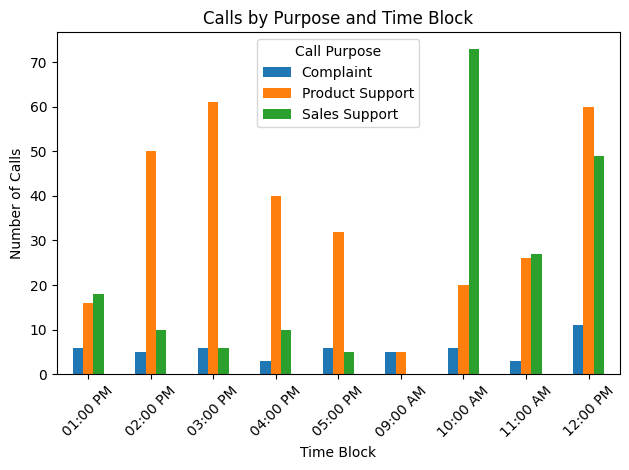

In [105]:
# Group by 'Call Purpose' and 'Time Block', summing the 'Calls'
grouped_data = df.groupby(['Call Purpose', 'Time Block'])['Calls'].sum().reset_index()

# Create a pivot table for better plotting
pivot_table = grouped_data.pivot(index='Time Block', columns='Call Purpose', values='Calls').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=False)
plt.title('Calls by Purpose and Time Block')
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend(title='Call Purpose')
plt.tight_layout()
plt.show()

#My idea was to create a column chart that is shown below. I was having a hard time with the prompt above. ChatGPT helped me create the chart below. I find the pivot_table.plot function easier
#to understand and plot. My only issue is sorting the timeblock in order. 